In [1]:
%pylab inline
%matplotlib inline
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/Argen/Documents/MAS/R&D/Code/pgm'])

Populating the interactive namespace from numpy and matplotlib
Python 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)] on darwin


In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

In [3]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [5]:
from pgm.utils.tools import draw_graph, node_types
from pgm.nodes.chance import Chance
from pgm.nodes.decision import Decision
from pgm.nodes.utility import Utility

In [6]:
def sp(x):
    #return len(x[1]['domain'])
    return len(T.node[x]['domain'])

def sz(V):
    s = 1
    for v in V:
        s = s * sp(v)
    return s

def fa(g, x, data=False):
    f = [x]
    if data:
        for n in g.neighbors(x[0]):
            f.append((n, g.node[n]))
        return f
    else:
        f.extend(g.neighbors(x))
        return f

def nb(g, x, data=False):
    neigh = []
    if data:
        for n in g.neighbors(x[0]):
            neigh.append((n, g.node[n]))
        return neigh
    else:
        return g.neighbors(x)

def is_simplicial(g, x):
    f = fa(g, x)
    n = nb(g, x)
    s = g.subgraph(f)
    # draw_graph(s, pos_ex)
    
    if len(n)>1:
        t = []
        for e1, e2 in list(combinations(n, 2)):
            if g.has_edge(e1, e2) or g.has_edge(e2, e1):
                t.append(True)
            else:
                t.append(False)
        if sum(t) == len(t):
            return True
        else:
            return False
    else:
        return True

In [7]:
def triangulate(ugraph):
    t = ugraph.copy()
    fill_ins = []
    cliques = []
    
    for n, w in sorted(windows.items(), reverse=True):
        size = {}
        for i in w:
            size[i] = sz(fa(t, i))
    
        while size != {}:
            # Remove simplicial nodes
            simplicial = [n for n in size if is_simplicial(t, n)]
    
            if len(simplicial) > 0:
                # print len(size), simplicial, t.nodes()
    
                for n in simplicial:
                    f = fa(t,n)
                    subset = filter(lambda x: set(f)< set(x), cliques)
                    if subset == []:
                        cliques.append(f)
                    t.remove_node(n)
                    size.pop(n)
                # print t.nodes()
            else:
                # print len(size),t.nodes()
                for i in size:
                    size[i] = sz(fa(t, i))
    
                if len(size) > 0:
                    candidate = min(size, key=size.get)
                    # s = t.subgraph(fa(t, candidate))
                    neigh = nb(t, candidate)
    
                    # print list(combinations(n, 2))
                    fill = []
                    # TODO: Algo esta mal con los cliques
                    for e1, e2 in list(combinations(neigh, 2)):
                        if not t.has_edge(e1, e2) or not t.has_edge(e2, e1):
                            # print candidate, e1, e2
                            t.add_edge(e1, e2)
                            fill_ins.append((e1, e2))
                            
                    f = fa(t,candidate)
                    subset = filter(lambda x: set(f)< set(x), cliques)
                    if subset == []:
                        cliques.append(f)
                    t.remove_node(candidate)
                    size.pop(candidate)
                    # print candidate, t.nodes()
            # draw_graph(t, pos_ex)
            return fill_ins, cliques

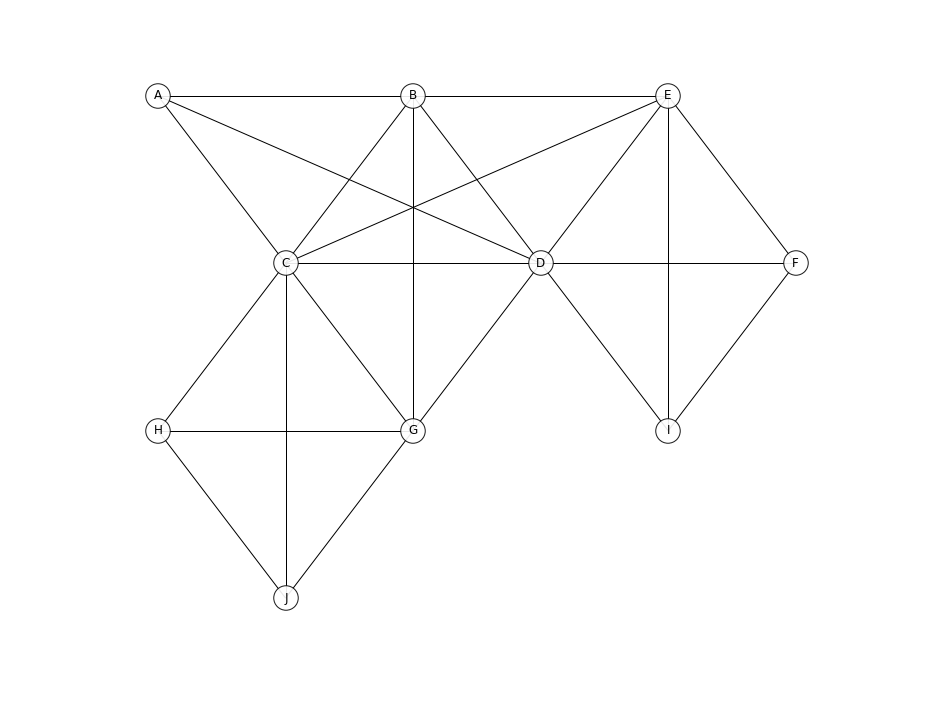

In [8]:
T = nx.Graph(title='triangulation_example')
T.add_nodes_from([('A', {'type': 'chance', 'domain': [1, 2]}), 
                  ('B', {'type': 'chance', 'domain': [1, 2]}),
                  ('C', {'type': 'chance', 'domain': [1, 2]}), 
                  ('D', {'type': 'chance', 'domain': [1, 2]}),
                  ('E', {'type': 'chance', 'domain': [1, 2]}),
                  ('F', {'type': 'chance', 'domain': [1, 2]}), 
                  ('G', {'type': 'chance', 'domain': [1, 2]}),
                  ('H', {'type': 'chance', 'domain': [1, 2]}), 
                  ('I', {'type': 'chance', 'domain': [1, 2]}),
                  ('J', {'type': 'chance', 'domain': [1, 2]})])
T.add_edges_from([('A', 'B'), ('B','E'),('A','C'),('B','C'),('B','D'),('E','D'),('E','F'),
                  ('A','D'),('E','C'),('B','G'),('E','I'),('C','D'),('D','F'),('C','H'),('C','G'),
                  ('D','G'),('D','I'),('F','I'),('H','J'),('G','J'),('C','J'),('H','G')])

pos_ex = {'A':(0,300),'B':(200,300),'C':(100,200),'D':(300,200),'E':(400,300),
          'F':(500,200),'G':(200,100),'H':(0,100),'I':(400,100),'J':(100,0)}

draw_graph(T, pos_ex)

In [9]:
order = {'A':5,'B':0,'C':4,'D':0,'E':0,'F':0,'G':0,'H':3,'I':2,'J':1}
windows = {0:['A','B','C','D','E','F','G','H','I','J']}

nx.is_chordal(T)

True

In [10]:
fill_ins, cliques = triangulate(T)
print fill_ins
print cliques

[]
[['A', 'C', 'B', 'D'], ['F', 'I', 'E', 'D'], ['H', 'C', 'J', 'G']]


In [11]:
nx.chordal_graph_cliques(T)

{frozenset({'A', 'B', 'C', 'D'}),
 frozenset({'D', 'E', 'F', 'I'}),
 frozenset({'B', 'C', 'D', 'E'}),
 frozenset({'C', 'G', 'H', 'J'}),
 frozenset({'B', 'C', 'D', 'G'})}

In [12]:
w = ['A','B','C','D','E','F','G','H','I','J']
simplicial = [n for n in w if is_simplicial(T, n)]
print simplicial

['A', 'F', 'H', 'I', 'J']


{'A': {'domain': [1, 2], 'type': 'chance'},
 'B': {'domain': [1, 2], 'type': 'chance'},
 'C': {'domain': [1, 2], 'type': 'chance'},
 'D': {'domain': [1, 2], 'type': 'chance'},
 'E': {'domain': [1, 2], 'type': 'chance'},
 'F': {'domain': [1, 2], 'type': 'chance'},
 'G': {'domain': [1, 2], 'type': 'chance'},
 'H': {'domain': [1, 2], 'type': 'chance'},
 'I': {'domain': [1, 2], 'type': 'chance'},
 'J': {'domain': [1, 2], 'type': 'chance'}}

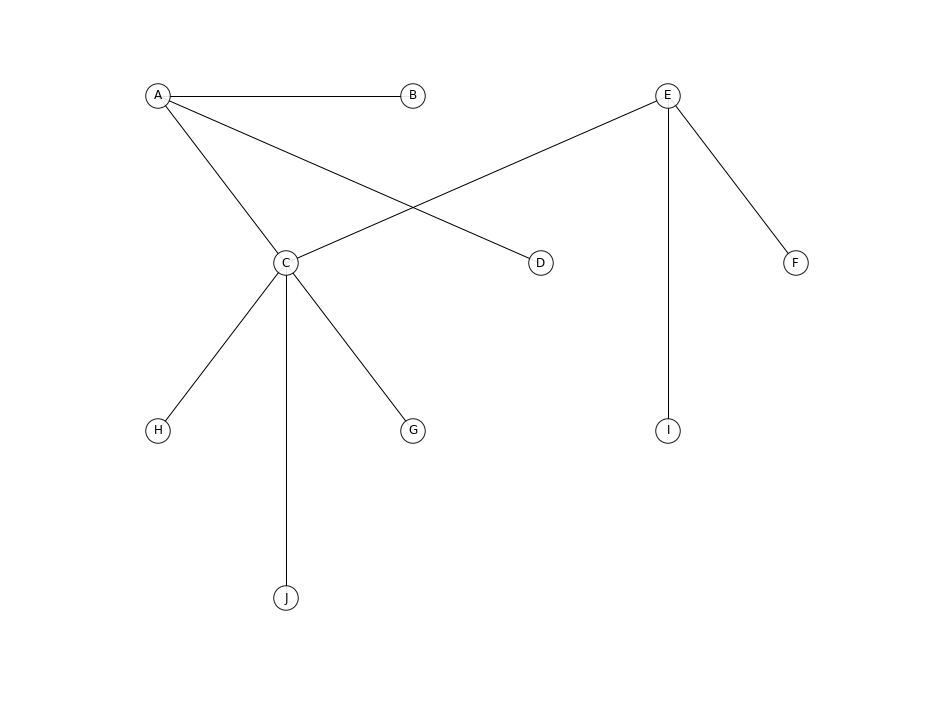

In [13]:
tree = nx.minimum_spanning_tree(T)
draw_graph(tree, pos_ex)
tree.node

In [14]:
list(nx.find_cliques(T))

[['I', 'E', 'D', 'F'],
 ['C', 'H', 'J', 'G'],
 ['C', 'B', 'D', 'A'],
 ['C', 'B', 'D', 'E'],
 ['C', 'B', 'D', 'G']]

In [15]:
nx.find_induced_nodes(T, 'A', 'I')

{'A', 'C', 'E', 'I'}

#### Junction Tree from a triangulated graph
It requires:
* An undirected graph with discrete variables as nodes
* For each clique $U$ in the graph there is a potential $\phi_{U}$

The compilation part of the method is to:
* triangulate the graph
* form a potential $\phi_{U}$ for each clique $U$ of the triangulated graph
* construct a junction tree over the cliques

####Junction Tree Property

For each pair $U$, $V$ of cliques with intersection $S$, all cliques between $U$ and $V$ contain $S$

####Propagation
* Giving all links in the junction tree a label consisting of the intersection of the adjacent nodes (Separators)
* Attaching a potential to all separators (initialized as one)
* letting the nodes communicate via the separators: A message from $U$ to $V$ with separator $S$ has the form that $\phi_{U}$ is marginalized down to $S$ resulting in $\phi_{S}^{\prime}$ ; $\phi_{S}^{\prime}$ is placed on the separator and ${\phi^{\prime}(S)}/{\phi(S)}$ is multiplied on $\phi_{V}$

###Junction Trees and Maximal Spanning Trees

The junction graph for $G$ has clique set $C$ as nodes and for each pair $U$, $V$ of cliques with nonempty intersection $R$ there is a link with label $R$. Each link has a weight which is the number of variables in the label.

A spanning tree for the junction graph G is a junction tree if and only if it is a spanning tree of maximal weight.

####Maximum Spanning Tree
A maximum spanning tree is a spanning tree of a weighted graph. It can be computed by negating the weights for each edge and applying Kruskai's Algorithm.




In [27]:
G = T.copy()
e = [(tuple(c1), tuple(c2), -c1c2)
                               for (c1, c2) in combinations(nx.find_cliques(G), 2)
                               for c1c2 in [len(set(c1).intersection(set(c2)))] if c1c2 > 0]
# print e

cliques = nx.find_cliques(G)
print tuple(cliques)
edges = []
for c1, c2 in combinations(cliques, 2):
    #print tuple(c1)
    #print 'Combination: ', c1, c2, ' Weight: ', len(set(c1).intersection(set(c2)))
    for c1c2 in [len(set(c1).intersection(set(c2)))]:
        #print 'Weight: ', c1c2
        if c1c2 >0:
            print 'Result: ',(c1,c2,-c1c2)

(['I', 'E', 'D', 'F'], ['C', 'H', 'J', 'G'], ['C', 'B', 'D', 'A'], ['C', 'B', 'D', 'E'], ['C', 'B', 'D', 'G'])


In [ ]:
def make_jtree_from_tri_graph(G):
    """returns JT graph"""

    # clique graph
    CG = nx.Graph()
    # maximal weight spanning tree of clique graph is guaranteed to be a junction tree
    # (i.e., it satisfies running intersection property)
    # where weight is the size of the intersection between adjacent cliques.
    CG.add_weighted_edges_from((tuple(c1), tuple(c2), -c1c2)
                               for (c1, c2) in it.combinations(nx.find_cliques(G), 2)
                               for c1c2 in [len(set(c1).intersection(set(c2)))] if c1c2 > 0)
    JT = nx.Graph(nx.mst(CG))  # Minimal weight spanning tree for CliqueGraph
    for src, targ in JT.edges():
        JT[src][targ]["sep"] = tuple(set(src).intersection(set(targ)))

    return JT
